<a href="https://colab.research.google.com/github/AmoghSinha/smartfarming/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
style.use('ggplot')

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
FILE_path = 'drive/My Drive/Colab Notebooks/IRIS.csv'
iris_data = pd.read_csv(FILE_path, header=0)

In [35]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [37]:
X = iris_data.copy()
X.drop('species', axis=1, inplace=True)

In [38]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
y = iris_data[['species']]
y.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [44]:
y_enc = LabelEncoder().fit_transform(y)
y_label = tf.keras.utils.to_categorical(y_enc)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.3)

In [46]:
print(X_train.shape)
print(y_train.shape)

(105, 4)
(105, 3)


In [47]:
def get_model():
    model = Sequential([
        keras.layers.Input(shape=X_train.shape[1:]),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(500, activation='relu',),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    return model

In [49]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              5000      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [50]:
model = get_model()
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 1s 91ms/step - loss: 1.1463 - accuracy: 0.3524 - val_loss: 1.0239 - val_accuracy: 0.6222
Epoch 2/30
4/4 [==============================] - 0s 20ms/step - loss: 0.8146 - accuracy: 0.6952 - val_loss: 0.5808 - val_accuracy: 0.7111
Epoch 3/30
4/4 [==============================] - 0s 22ms/step - loss: 0.7016 - accuracy: 0.6476 - val_loss: 0.4877 - val_accuracy: 0.7111
Epoch 4/30
4/4 [==============================] - 0s 19ms/step - loss: 0.5260 - accuracy: 0.7048 - val_loss: 0.5807 - val_accuracy: 0.6222
Epoch 5/30
4/4 [==============================] - 0s 20ms/step - loss: 0.4730 - accuracy: 0.7048 - val_loss: 0.3882 - val_accuracy: 0.9778
Epoch 6/30
4/4 [==============================] - 0s 20ms/step - loss: 0.3943 - accuracy: 0.8000 - val_loss: 0.3279 - val_accuracy: 0.8889
Epoch 7/30
4/4 [==============================] - 0s 20ms/step - loss: 0.3432 - accuracy: 0.9048 - val_loss: 0.3475 - val_accuracy: 0.8444
Epoch 8/30
4/4 [===========

In [52]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.0362 - accuracy: 1.0000


[0.036183930933475494, 1.0]

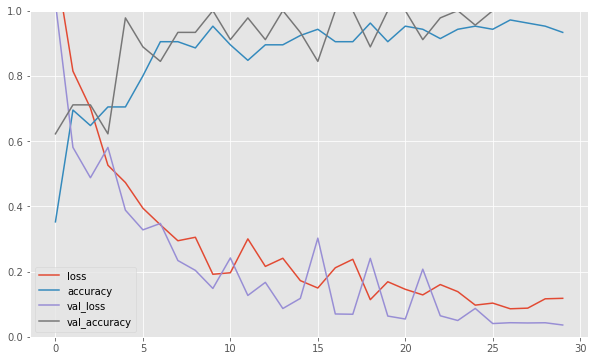

In [72]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [55]:
y_predicted = model.predict(X_test[:10])

print(y_test[:10])

print(np.argmax(y_predicted, axis=1))

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[1 2 1 0 1 2 2 1 2 0]
